In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from os.path import basename

from json import dumps 

import seaborn as sns
sns.set()
sns.set(font_scale=1.5)


%matplotlib inline

plt.rcParams['figure.figsize'] = (7,15)
%config InlineBackend.figure_format = 'retina'

# Plotting "Coefficient" Summary Plots
We'll create a function to plot, for a single dataset, the top *N* coefficients in magnitude for all methods. We'll chain them together to create the figure for the paper. 

In [81]:
coefs_df = pd.read_csv('../plots/plants5-extendedDrop/Alpine-Plants-extendeddrop-coefs.csv', index_col = 0)

In [82]:
coefs_df = coefs_df.iloc[:10]
coefs_df = coefs_df[["OLS", "Ridge", "Kernel Ridge", "RF", "SVR"]]
coefs_df = coefs_df.iloc[::-1] # not sure why but it seems like it needs to be reversed for plotting to work right?

In [6]:
def coefsSubplot(coefs, method, ax, labels=None):
    """
        create a horizontal barplot with <coefs> on the Y axis for given method.
    """
    bar_indices = np.arange(len(coefs))
    
    for b in bar_indices + 1:
        if b % 2:
            ax.axhspan(b-0.5, b+0.5, alpha=0.2)
    
    ax.axvline(0, color='black', linestyle = '--')
    
    ax.barh(bar_indices,
             coefs,
             align='center', color='#4b2e83')
    
  
    if labels is not None:
        ax.set_yticks(bar_indices)
        ax.set_yticklabels(labels)
    else:
        ax.set_yticklabels([])
    ax.set_title(method)


In [ ]:
sns.set_style("white")

def dataset_coefplot(dataset_coefs, ax = None, title=None):
    """
        create set of horizontal barplots, one for each method, for a given dataset. (return axis upon which it was plotted)
    """

    if ax is None:
        fig, ax = plt.subplots(nrows = 1,
                                 ncols = len(dataset_coefs.columns), 
                                 sharey = True, 
                                 figsize=(20,5))
    for i, c in enumerate(dataset_coefs.columns):
        if (i == 0):
            print(dataset_coefs.index)
            coefsSubplot(dataset_coefs[c].values, c, ax[i], labels=list(dataset_coefs.index))
        else: 
            coefsSubplot(dataset_coefs[c].values, c, ax[i], labels=None)

    if title is not None and ax is None:
        fig.suptitle(title, x=-0.05, y=0.92, fontsize=16, weight='bold')
    if title is not None and ax is not None:
        ax[0].suptitle(title, x=-0.05, y=0.92, fontsize=16, weight='bold')
    return axes

**testing**

Index(['LifeStrategy_ccc', 'RelativeAbundance', 'LifeStrategy_css',
       'RetInFurSheep', 'LifeStrategy_ccs', 'NutrientIndicator', 'LifeSpan',
       'LifeStrategy_crs', 'SeedReleaseHeight', 'TemperatureIndicator'],
      dtype='object')
Index(['DemersPelag_bathydemersal', 'DemersPelag_demersal', 'Fresh_-1',
       'DemersPelag_pelagic-oceanic', 'Vulnerability', 'Length',
       'DepthRangeDeep', 'DemersPelag_benthopelagic',
       'DemersPelag_pelagic-neritic', 'DemersPelag_reef-associated'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ebb3c9438>,
      dtype=object)

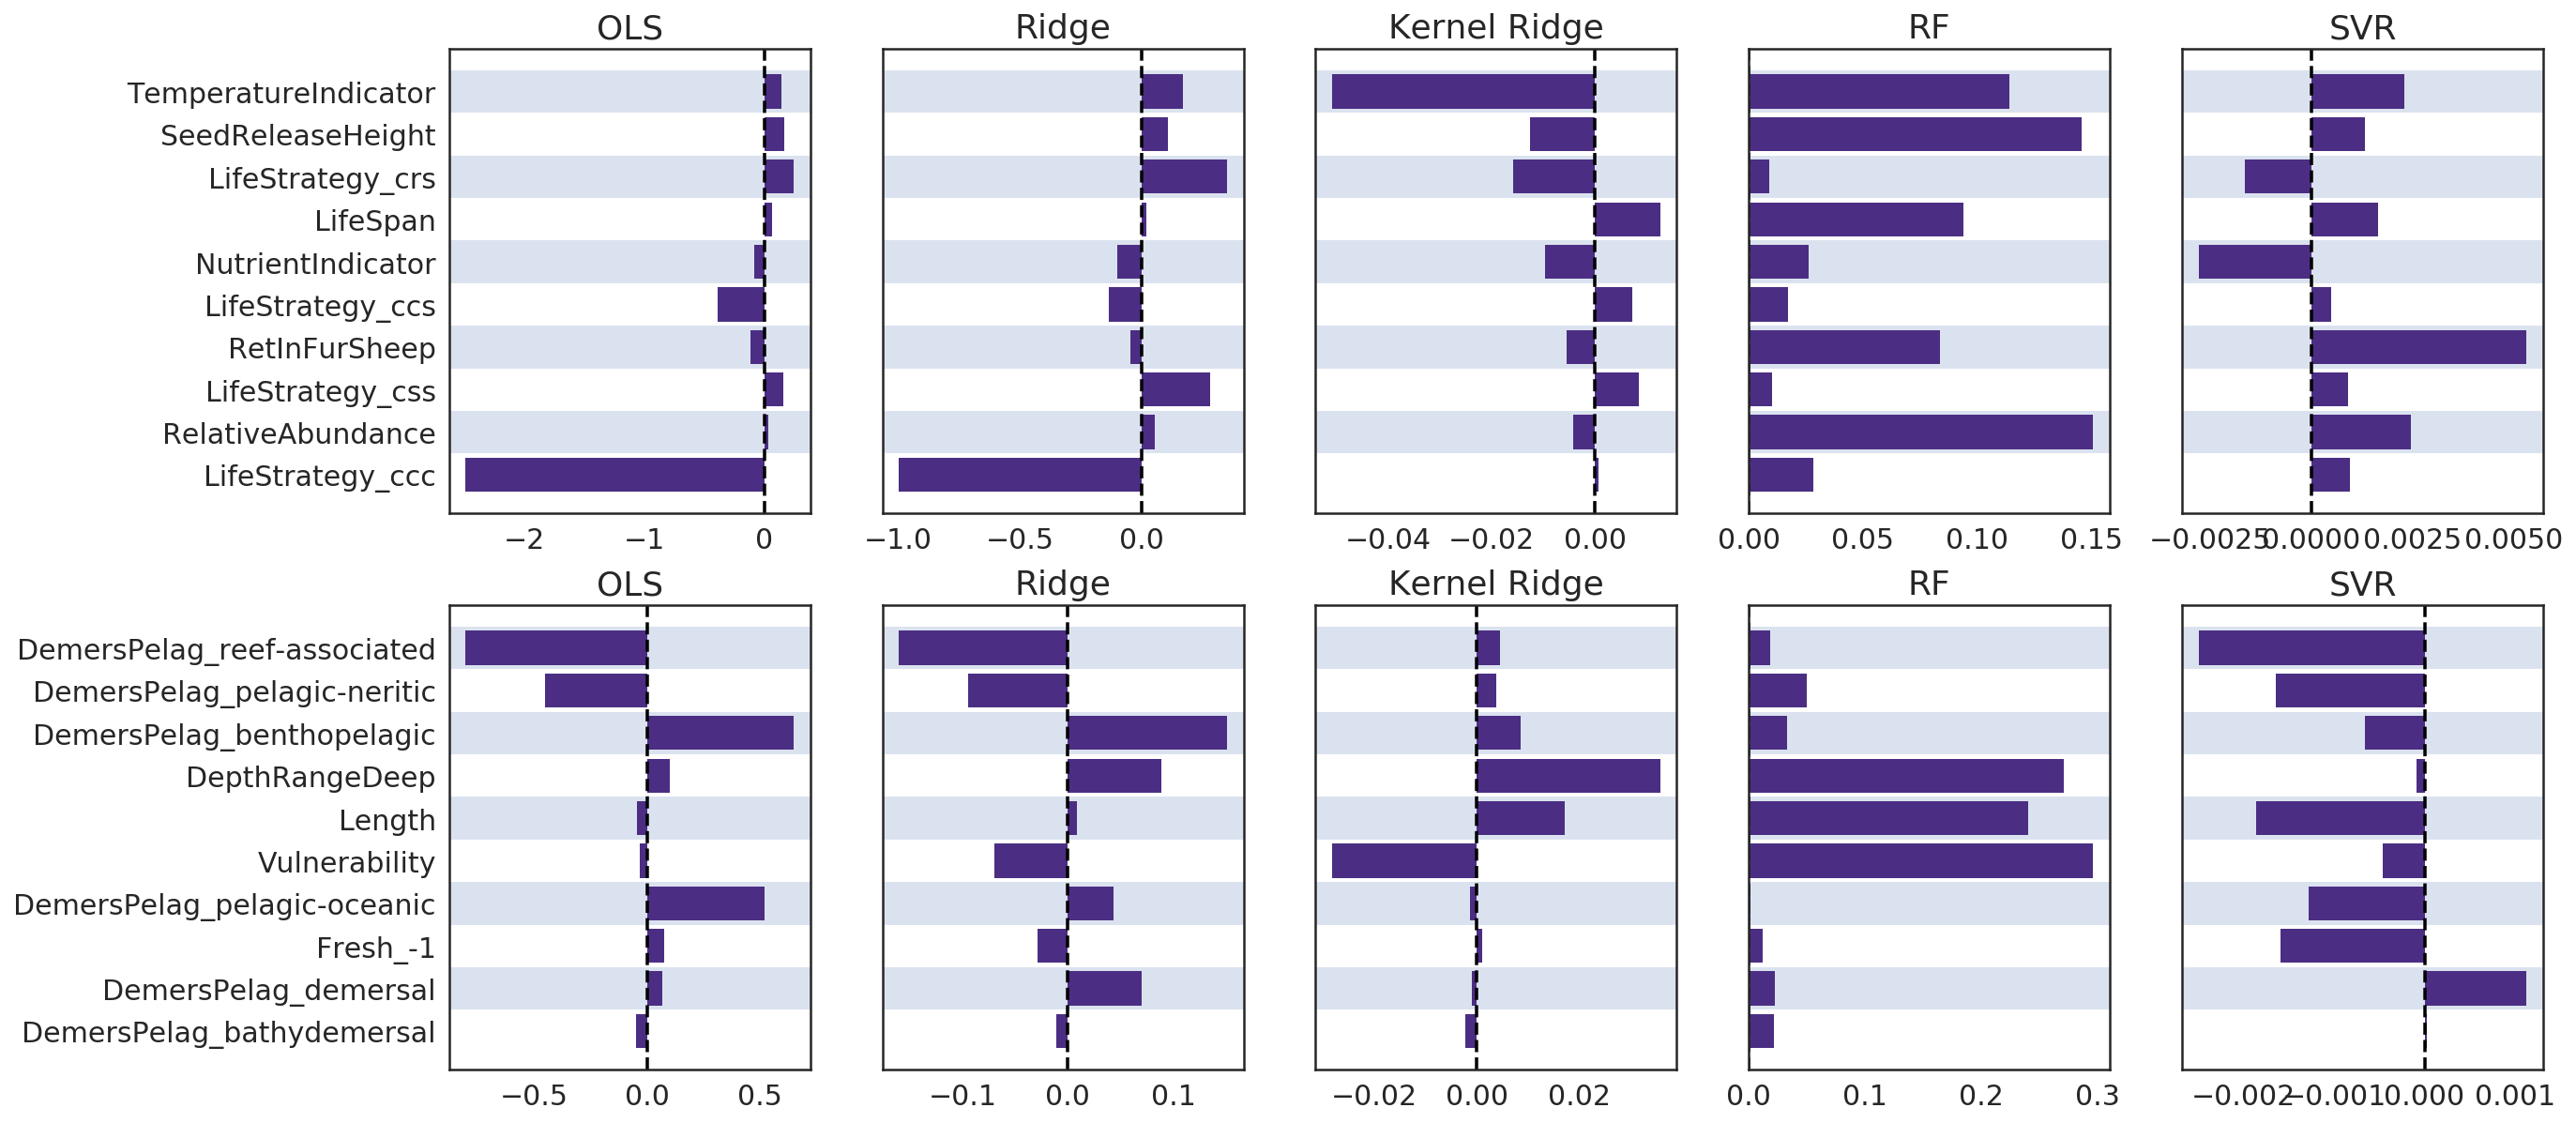

In [238]:
fig, axes = plt.subplots(ncols = 5, nrows = 2, figsize=(20, 10))
dataset_coefplot(coefs_df, ax=axes[0])
dataset_coefplot(ds2, ax = axes[1])

In [229]:
axes.shape

(2, 5)

---
## Chain Them Together

In [17]:
datasets = [
    "../plots/TRY/TRY-rumpfdata-coefs.csv", 
    "../plots/plants5-extendedDrop/Alpine-Plants-extendeddrop-coefs.csv", 
    "../plots/mammals-extendeddrop/Mammals-extendeddrop-coefs.csv",
    "../plots/marine-extendeddrop/triennialMarineData-extendeddrop-coefs.csv", 
]

../plots/TRY/TRY-rumpfdata-coefs.csv
Index(['LifeStrategy_ccc', 'RelativeAbundance', 'LifeStrategy_css',
       'RetInFurSheep', 'LifeStrategy_ccs', 'NutrientIndicator', 'LifeSpan',
       'LifeStrategy_crs', 'SeedReleaseHeight', 'TemperatureIndicator'],
      dtype='object')
0
../plots/plants5-extendedDrop/Alpine-Plants-extendeddrop-coefs.csv
Index(['Total Number of Floristic Zones', 'Seed Mass (mg)', 'ReprModeCode',
       'Diaspore Minimum Length (mm)', 'Breeding: Mixed Mating I ',
       'Gravity Dispersal Mode (binary)', 'Seed Shed Duration (months)',
       'Seed Shed Month (latest)', 'Seed Shed Month (earliest)',
       'Minimum Seed Shed Height (m)'],
      dtype='object')
1
../plots/mammals-extendeddrop/Mammals-extendeddrop-coefs.csv
Index(['Insectivore (binary)', 'Young / year', 'Range Size (km2)', 'Food_code',
       'Rhythm: Diurnal + Nocturnal (binary)', 'Granivore (binary) ??',
       'Facultative Hibernation (binary) ', 'Bio1_std', 'Altitudinal Limit',
       'Longevity 

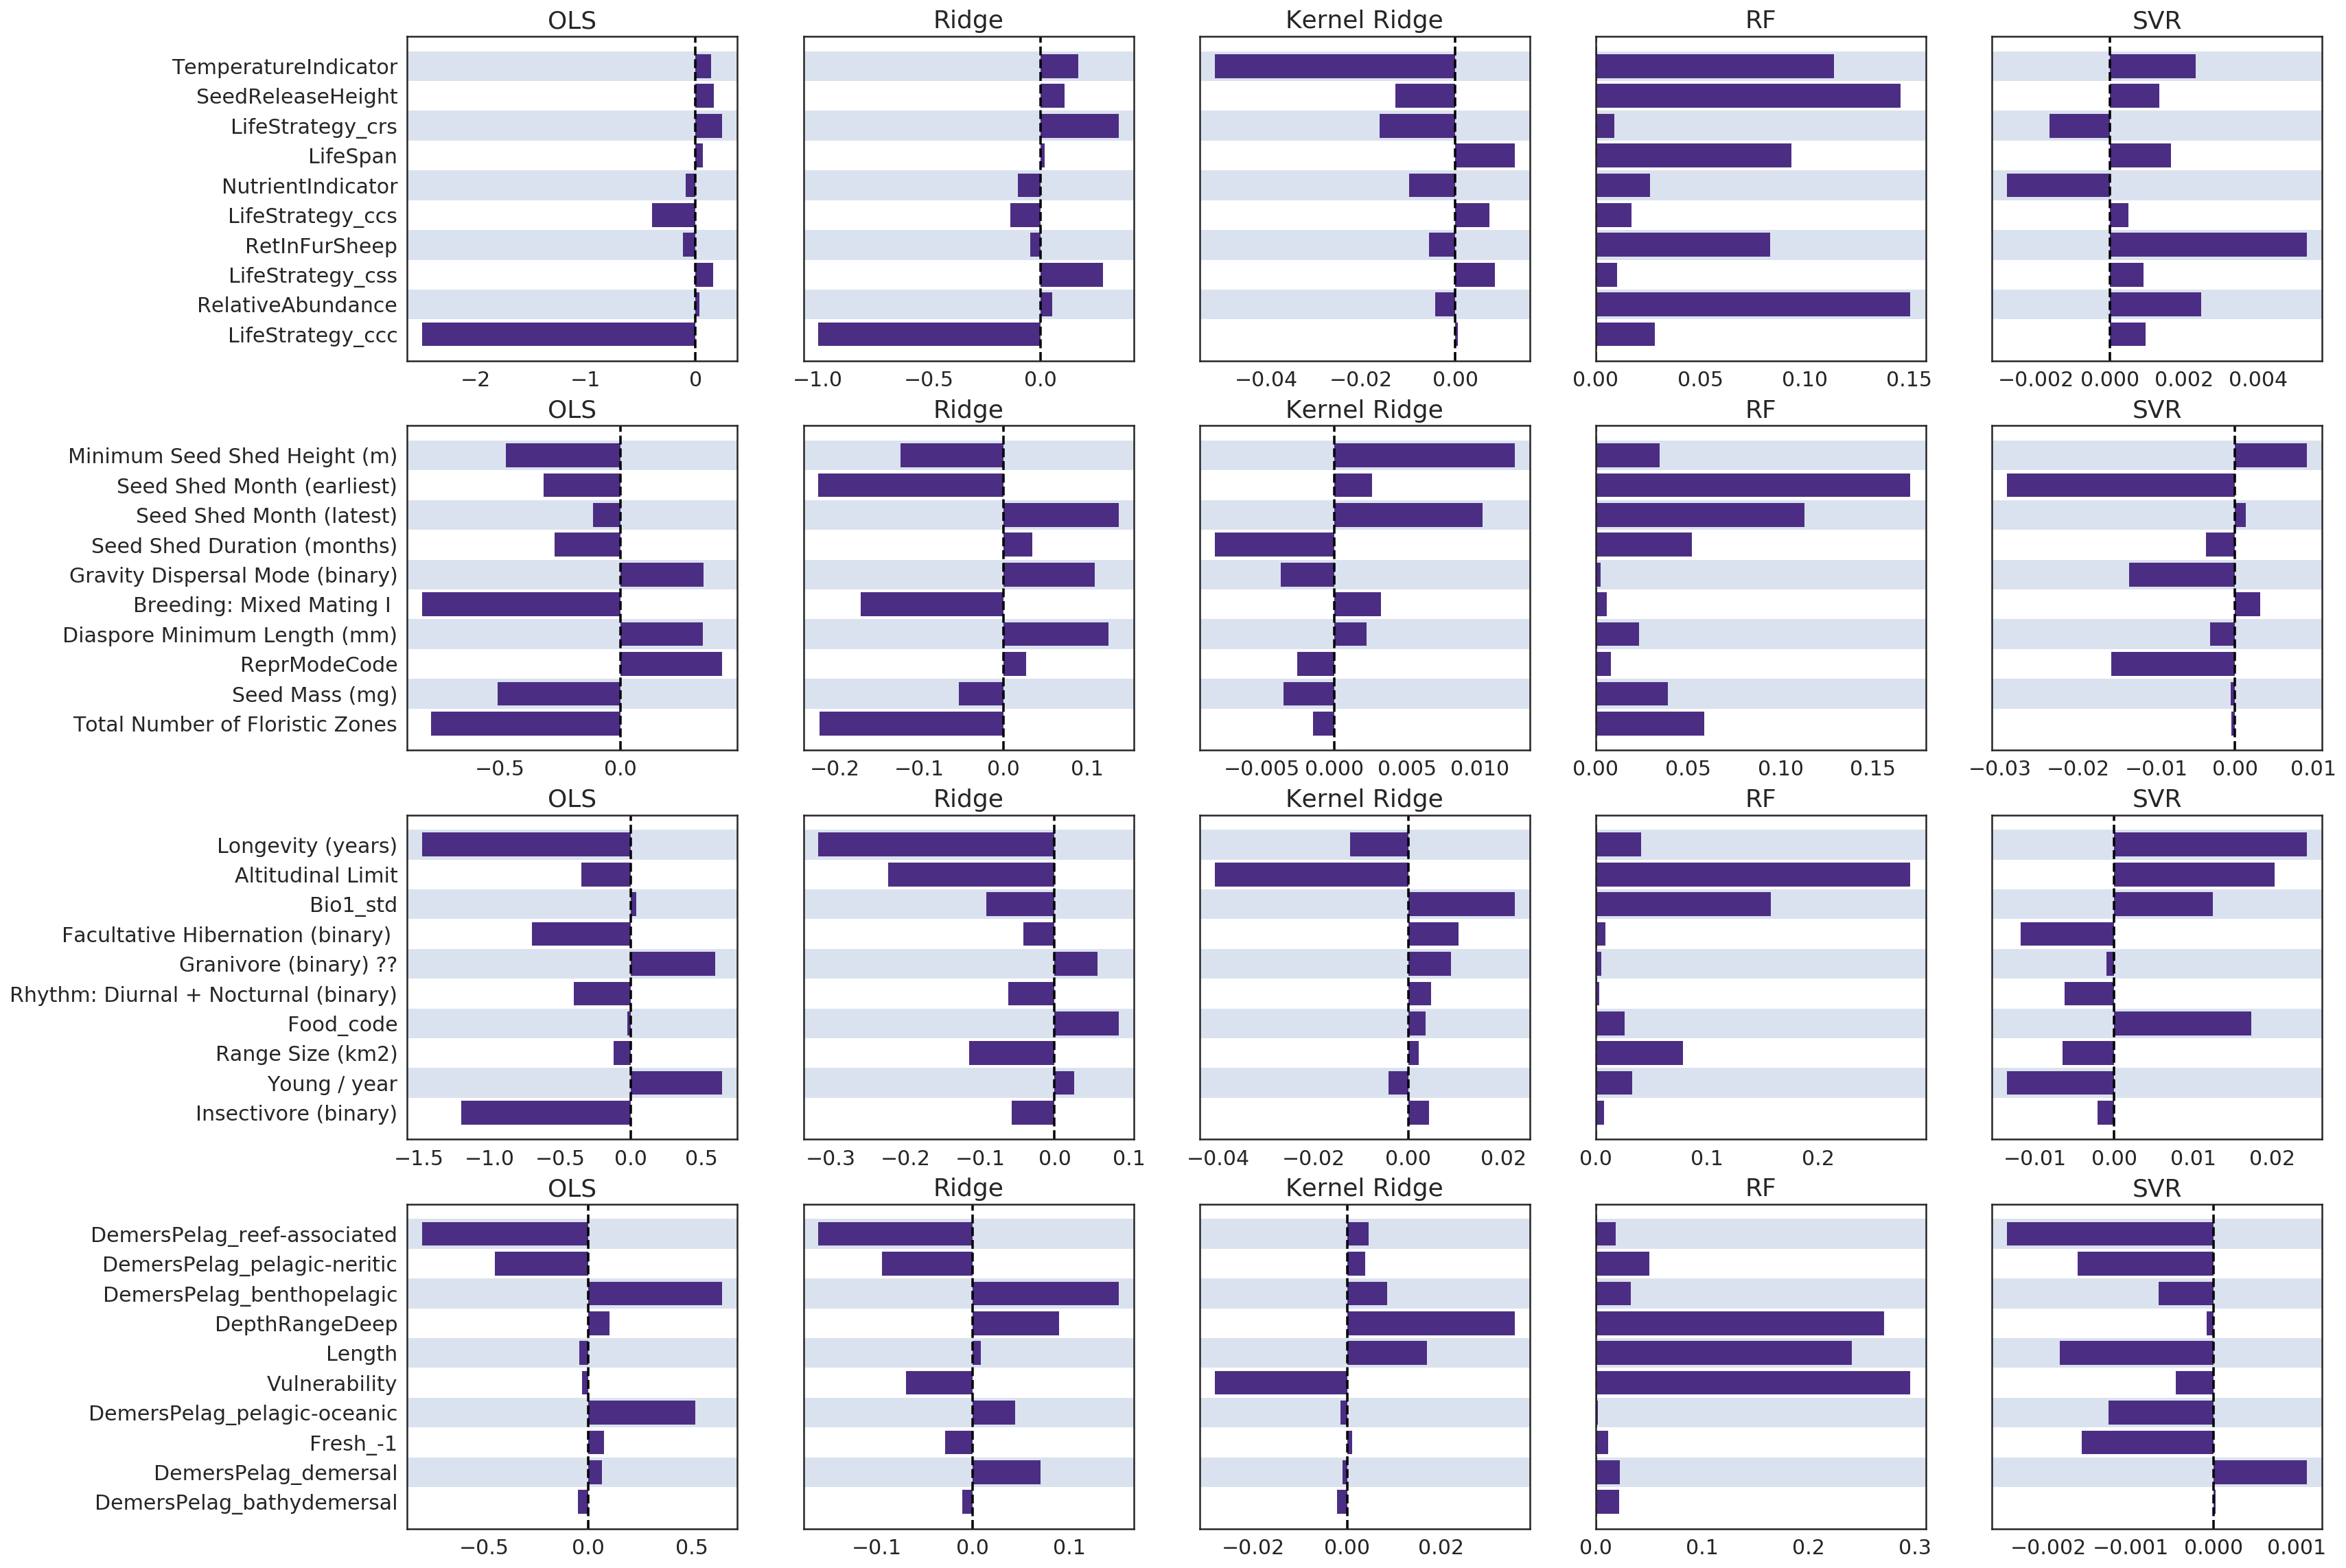

In [18]:
fig, axes = plt.subplots(ncols = 5, nrows = len(datasets), figsize=(25, 20))

for i, ds in enumerate(datasets):
    print(ds)
    coefs_df = pd.read_csv(ds, index_col = 0)
    coefs_df = coefs_df.iloc[:10]
    coefs_df = coefs_df[["OLS", "Ridge", "Kernel Ridge", "RF", "SVR"]]
    coefs_df = coefs_df.iloc[::-1] # not sure why but it seems like it needs to be reversed for plotting to work right?
    dataset_coefplot(coefs_df, ax=axes[i])
    print(i)

plt.savefig("merged_test.png")
plt.show()


The figure present in the manuscript will need to be adjusted in photo-editing tools. 